Basic

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Define transformation to be applied to the data
transform = transforms.Compose([transforms.ToTensor()])


In [ ]:

# Download MNIST Fashion dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)


In [ ]:
# Create data loaders
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1000, shuffle=False)

In [ ]:
# Define autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28x1 -> 14x14x16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14x16 -> 7x7x32
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7x32 -> 14x14x16
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14x16 -> 28x28x1
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Instantiate the autoencoder
autoencoder = Autoencoder()

In [ ]:

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)


In [ ]:
# Training the autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        recon = autoencoder(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0034
Epoch [2/10], Loss: 0.0021
Epoch [3/10], Loss: 0.0014
Epoch [4/10], Loss: 0.0010
Epoch [5/10], Loss: 0.0010
Epoch [6/10], Loss: 0.0008
Epoch [7/10], Loss: 0.0007
Epoch [8/10], Loss: 0.0007
Epoch [9/10], Loss: 0.0006
Epoch [10/10], Loss: 0.0006


In [ ]:
# Testing the autoencoder
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        recon = autoencoder(img)
        break

In [ ]:
# Displaying some results
import matplotlib.pyplot as plt
import numpy as np


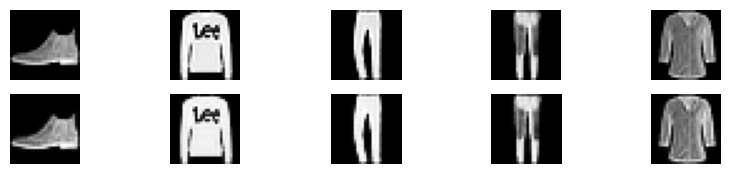

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    # Original Images
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.squeeze(img[i]), cmap='gray')
    plt.axis('off')

    # Reconstructed Images
    plt.subplot(2, 5, i + 6)
    plt.imshow(np.squeeze(recon[i]), cmap='gray')
    plt.axis('off')

plt.show()

Denoising

In [ ]:


import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Define transformation to be applied to the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.3 * torch.randn_like(x))  # Add Gaussian noise
])

In [ ]:
# Download MNIST Fashion dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)


In [ ]:
# Create data loaders
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1000, shuffle=False)


In [ ]:
# Define autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28x1 -> 14x14x16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14x16 -> 7x7x32
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7x32 -> 14x14x16
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14x16 -> 28x28x1
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:

# Instantiate the autoencoder
autoencoder = Autoencoder()


In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [ ]:
# Training the denoising autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        recon = autoencoder(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.0373
Epoch [2/10], Loss: 0.0336
Epoch [3/10], Loss: 0.0320
Epoch [4/10], Loss: 0.0319
Epoch [5/10], Loss: 0.0329
Epoch [6/10], Loss: 0.0319
Epoch [7/10], Loss: 0.0316
Epoch [8/10], Loss: 0.0312
Epoch [9/10], Loss: 0.0314
Epoch [10/10], Loss: 0.0327


In [ ]:
# Testing the denoising autoencoder
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        recon = autoencoder(img)
        break

In [ ]:
# Displaying some results
import matplotlib.pyplot as plt
import numpy as np




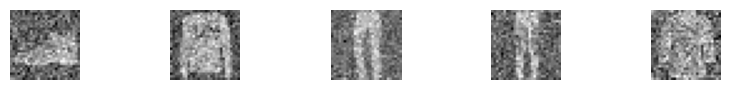

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    # Original Noisy Images
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.squeeze(img[i]), cmap='gray')
    plt.axis('off')

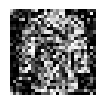

In [ ]:
# Reconstructed Clean Images
plt.subplot(2, 5, i + 6)
plt.imshow(np.squeeze(recon[i]), cmap='gray')
plt.axis('off')
plt.show()


Define a convolutional autoencoder

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Define transformation to be applied to the data
transform = transforms.Compose([
    transforms.ToTensor(),
])


In [ ]:
# Download MNIST Fashion dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)


In [ ]:
# Create data loaders
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1000, shuffle=False)


In [ ]:
# Define convolutional autoencoder architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28x1 -> 14x14x16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14x16 -> 7x7x32
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7x32 -> 14x14x16
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14x16 -> 28x28x1
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Instantiate the convolutional autoencoder
conv_autoencoder = ConvAutoencoder()

In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(conv_autoencoder.parameters(), lr=0.001)


In [ ]:
# Training the convolutional autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        recon = conv_autoencoder(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.0031
Epoch [2/10], Loss: 0.0021
Epoch [3/10], Loss: 0.0013
Epoch [4/10], Loss: 0.0010
Epoch [5/10], Loss: 0.0009
Epoch [6/10], Loss: 0.0009
Epoch [7/10], Loss: 0.0008
Epoch [8/10], Loss: 0.0007
Epoch [9/10], Loss: 0.0007
Epoch [10/10], Loss: 0.0007


In [ ]:
# Testing the convolutional autoencoder
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        recon = conv_autoencoder(img)
        break


In [ ]:
# Displaying some results
import matplotlib.pyplot as plt
import numpy as np


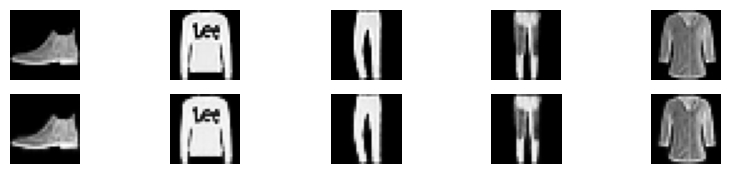

In [ ]:

plt.figure(figsize=(10, 2))
for i in range(5):
    # Original Images
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.squeeze(img[i]), cmap='gray')
    plt.axis('off')

    # Reconstructed Images
    plt.subplot(2, 5, i + 6)
    plt.imshow(np.squeeze(recon[i]), cmap='gray')
    plt.axis('off')

plt.show()